## By: PRERNA PANDEY

# The Sparks Foundation

## Data Science & Business Analytics Intern

## Task 3 : Exploratory Data Analysis - Retail

### For this task, We have to perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

#### Data Source : https://bit.ly/3i4rbWl

### Problem Statement :  find out the weak areas where you can work to make more profit.

In [1]:
# Importing Library

import pandas as pd  # Data Manupulation
import numpy as np  # Linear Algebra
import seaborn as sns  # statistics
import matplotlib      #Visualisation
%matplotlib inline
from matplotlib import pyplot as plt
import warnings # Warnings

In [2]:
location = r"C:\Users\Prerna&1398\Desktop\DATA SCIENCE\The Sparks Foundation\Dataset_spark\data3\SampleSuperstore.csv"
data = pd.read_csv(location, header = 'infer') # Reading the Dataset

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()  # Information of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [6]:
data.describe(include = 'object').T

,count,unique,top,freq
Ship Mode,9994,4,Standard Class,5968
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523


In [7]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### As we can see, there is no missing value in Dataset

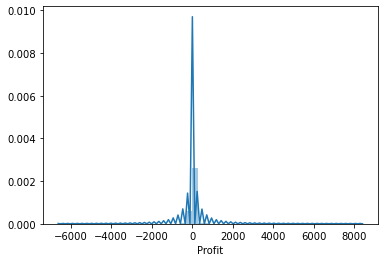

In [9]:
sns.distplot(data['Profit'])

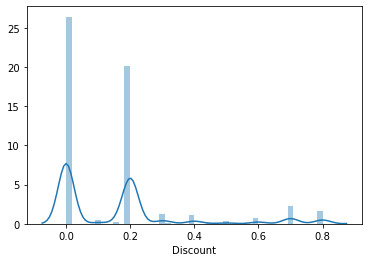

In [10]:
sns.distplot(data['Discount'])

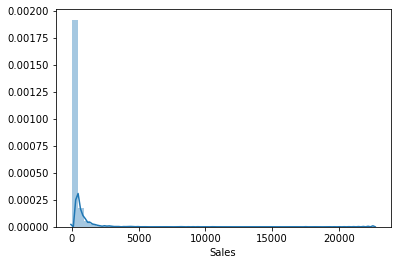

In [11]:
sns.distplot(data['Sales'])

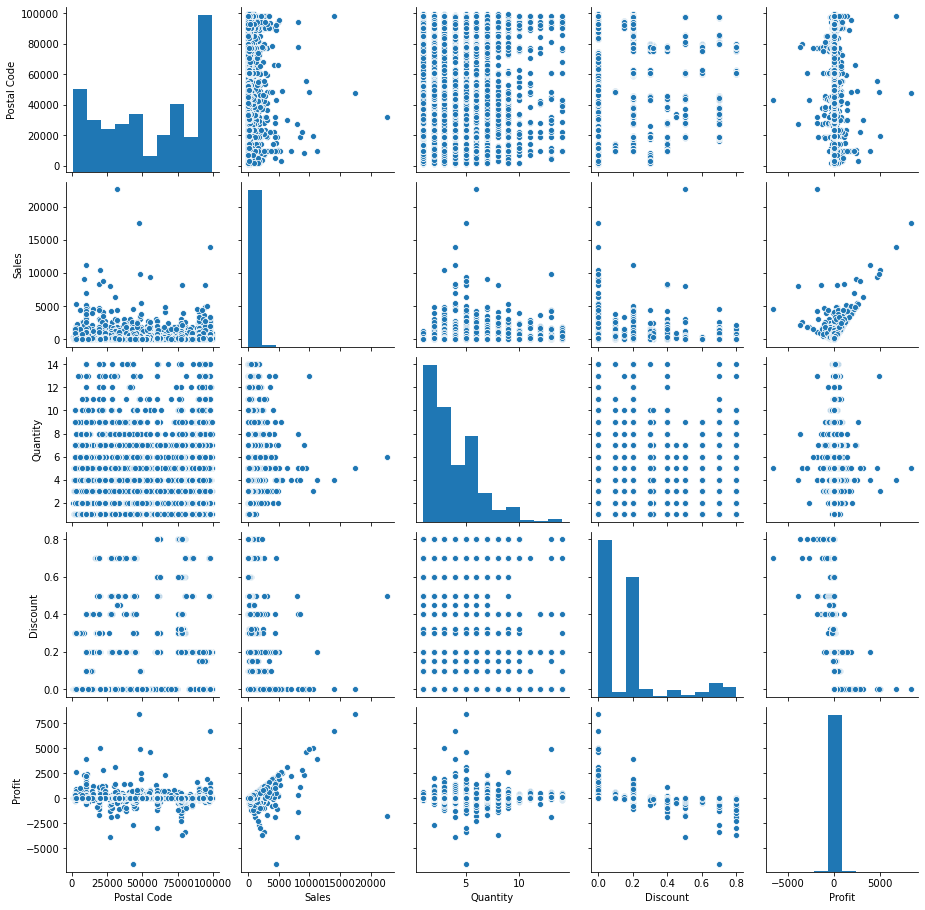

In [12]:
sns.pairplot(data)

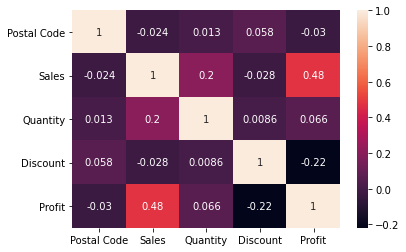

In [13]:
sns.heatmap(data.corr(), annot = True)

#### As we can see the 'Profit' is positively correlated with the sales

From Above Correlation Matrix (Heatmap) we can say:

###### Profit and Sales are moderately correlated.
###### Profit and Discount are negatively correlated.
###### Quantity and Sales are less correlated.

### Pairplot to analyse to each column

### 1. Based on Category

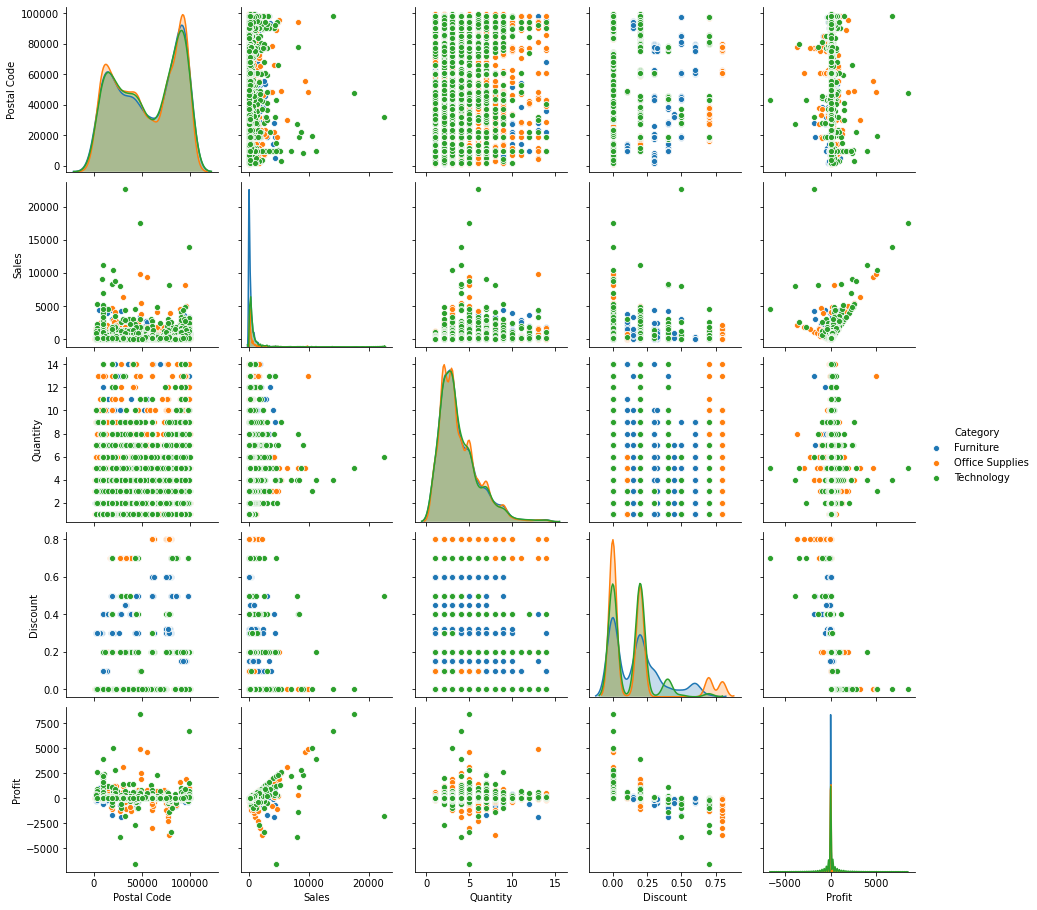

In [14]:
sns.pairplot(data, hue = 'Category')

### 2. Based on Region

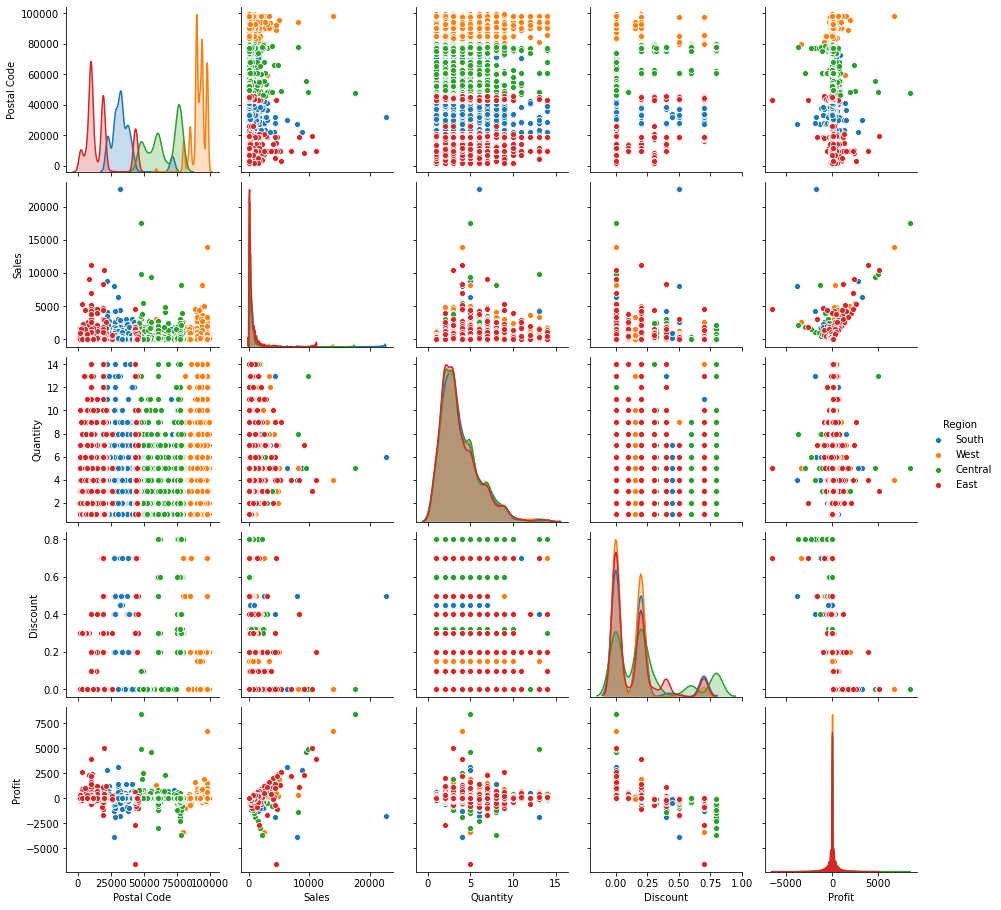

In [15]:
sns.pairplot(data, hue = 'Region')

### 3. Based on Segment

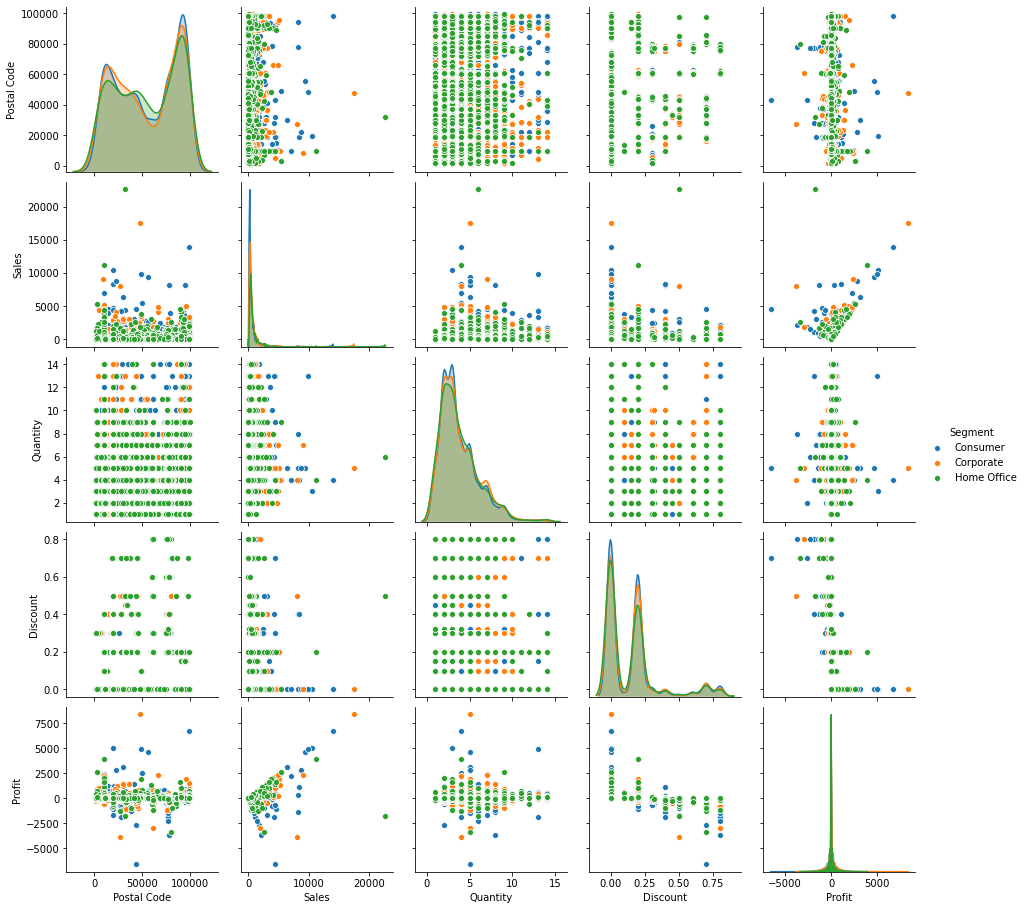

In [16]:
sns.pairplot(data, hue = "Segment")

### Analyzing Profit based on various aspects

### 1. Based on Ship Mode

In [17]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

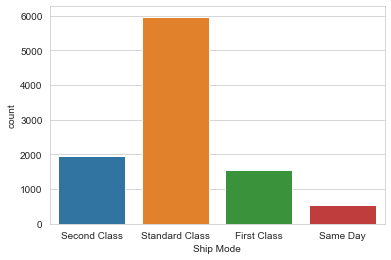

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Ship Mode',data=data)

In [19]:
data_shipmode = data.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
data_shipmode

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.497024,0.164610,31.839948
Same Day,236.396179,0.152394,29.266591
Second Class,236.089239,0.138895,29.535545
Standard Class,227.583067,0.160023,27.494770


In [20]:
data[data['Ship Mode'] == 'First Class'].Profit.sum()

48969.8399

In [21]:
data[data['Ship Mode'] == 'Same Day'].Profit.sum()

15891.7589

In [22]:
data[data['Ship Mode'] == 'Second Class'].Profit.sum()

57446.63540000001

In [23]:
data[data['Ship Mode'] == 'Standard Class'].Profit.sum()

164088.7875

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234EA86AB50>,
      dtype=object)

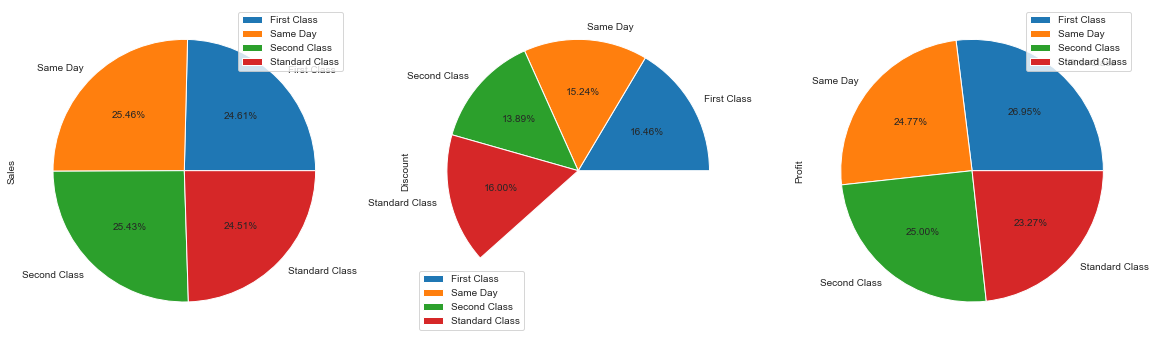

In [24]:
data_shipmode.plot.pie(subplots=True, label=data_shipmode.index, autopct='%1.2f%%', figsize=(20,20))

##### Sales are more in "Same Day"
##### Discount are more in "First Class"
##### Profit are more in "First Class"

### 2. Based on Segment

In [25]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

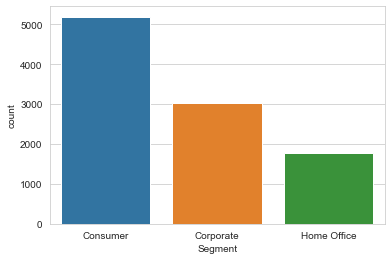

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Segment',data=data)

In [27]:
data_segment = data.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
data_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


In [28]:
data[data['Segment'] == 'Consumer'].Profit.sum()

134119.2092

In [29]:
data[data['Segment'] == 'Corporate'].Profit.sum()


91979.13399999999

In [30]:
data[data['Segment'] == 'Home Office'].Profit.sum()

60298.678499999995

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234EA9C5B50>,
      dtype=object)

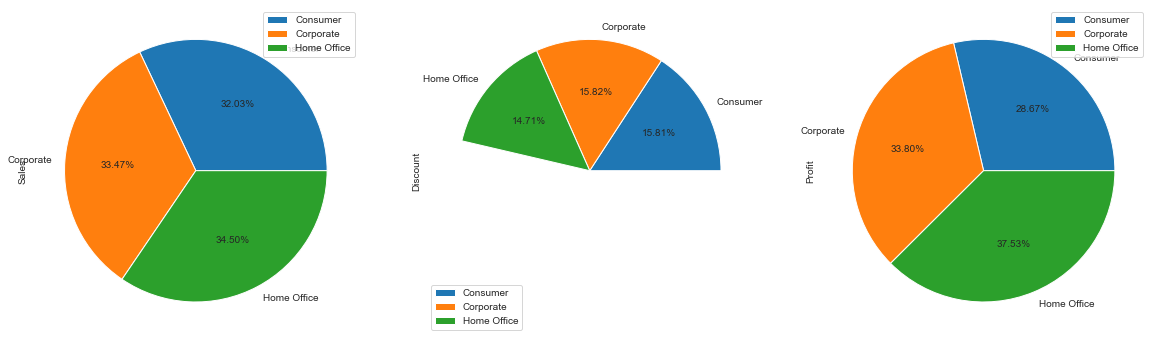

In [31]:
data_segment.plot.pie(subplots=True, label=data_segment.index, autopct='%1.2f%%', figsize=(20,20))

##### Sales are more in "Home Office"
##### Discount are more in "Corporate"
##### Profit are more in "Home Office"

### 3. Based on city

In [32]:
data['City'].value_counts()

New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Seattle           428
                 ... 
Iowa City           1
Saint Peters        1
Citrus Heights      1
Norfolk             1
Linden              1
Name: City, Length: 531, dtype: int64

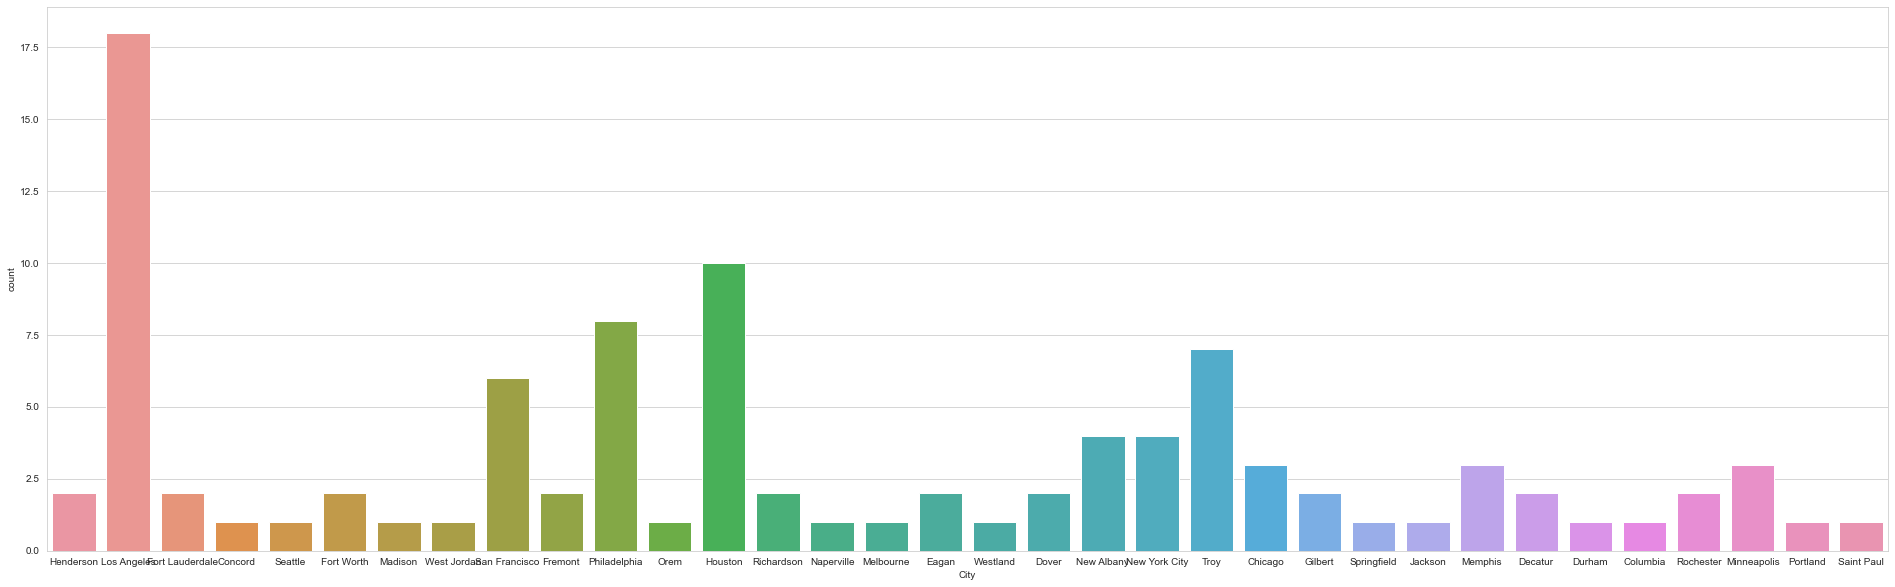

In [33]:
fig, ax = plt.subplots(figsize = (33, 10))
sns.countplot(data['City'].head(100))

In [34]:
data_city = data.groupby(['City'])[['Sales','Discount','Profit']].mean()
data_city.head(10)

,Sales,Discount,Profit
City,,,
Aberdeen,25.500000,0.000000,6.630000
Abilene,1.392000,0.800000,-3.758400
Akron,129.999333,0.357143,-8.887410
Albuquerque,158.582857,0.057143,45.292007
Alexandria,344.973125,0.000000,19.913644
Allen,72.551500,0.375000,-9.969375
Allentown,121.893143,0.271429,-32.350057
Altoona,10.225500,0.450000,-0.591750
Amarillo,377.306280,0.272000,-38.796830


In [35]:
data_city.tail(10)


,Sales,Discount,Profit
City,,,
Wilmington,202.696139,0.080556,54.102831
Wilson,61.455333,0.366667,-2.389333
Woodbury,202.550000,0.000000,65.365400
Woodland,88.220667,0.133333,11.128267
Woodstock,228.780000,0.260000,15.998580
Woonsocket,48.887500,0.000000,19.669775
Yonkers,510.511067,0.066667,184.517047
York,163.595600,0.420000,-20.433840
Yucaipa,50.800000,0.000000,13.208000


#### Sorting the cities with respect to Profit in Descending

In [36]:
data_city = data_city.sort_values('Profit', ascending = False)

data_city.head(10)

,Sales,Discount,Profit
City,,,
Jamestown,2354.395000,0.000000,642.885750
Independence,1208.685000,0.000000,487.831500
Lafayette,807.619355,0.000000,323.173794
Minneapolis,733.501739,0.000000,296.721070
Appleton,835.655000,0.000000,277.383150
Morristown,719.014286,0.000000,262.603871
Burbank,1082.386000,0.066667,254.844600
Lehi,758.363000,0.100000,225.831300
Beverly,861.063333,0.000000,218.306467


In [37]:
data_city.tail(10)

,Sales,Discount,Profit
City,,,
Yuma,210.216250,0.450000,-116.497725
San Antonio,370.229288,0.383051,-123.712715
Burlington,866.723280,0.136000,-144.915088
Medina,275.302444,0.433333,-149.227178
Clarksville,316.818571,0.271429,-150.764743
Lancaster,215.031826,0.315217,-157.371052
Round Rock,693.436114,0.274286,-169.061614
Oswego,107.326000,0.600000,-178.709200
Champaign,151.960000,0.600000,-182.352000


### Ploting Sales, Discount, Profit of Top 30 cities

Text(0.5, 1.0, 'City wise analysis of Profit')

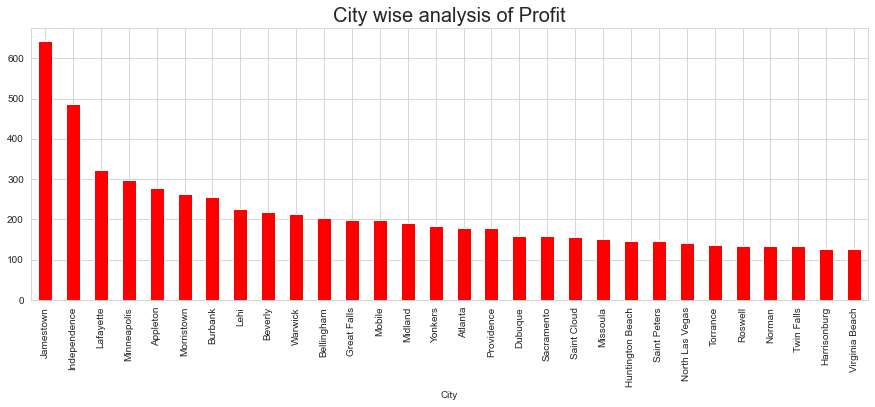

In [38]:
data_city['Profit'].head(30).plot(kind='bar',figsize=(15,5), color = "red")
plt.title("City wise analysis of Profit", size="20")

### Ploting Sales, Discount, Profit of Least 30 cities

Text(0.5, 1.0, 'City wise analysis of Profit')

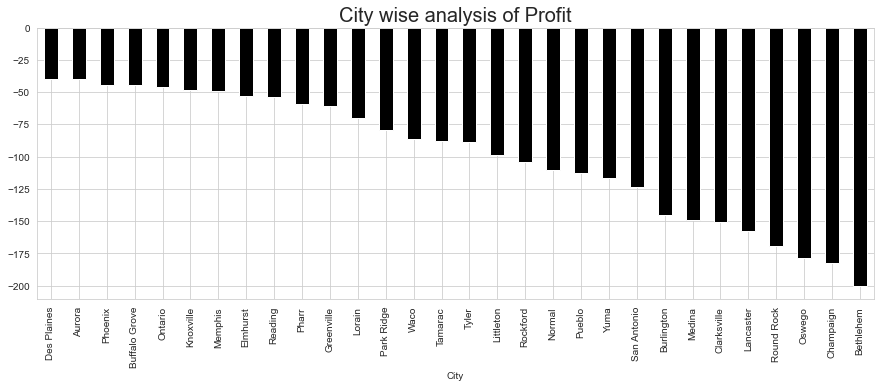

In [39]:
data_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5), color = 'black')
plt.title("City wise analysis of Profit", size="20")

#### Based on above visualisation we come to that.
#### Highest Profit is in "Jamestown"
#### Lowest Profit is in "Bethlehem"

### 4. Based on State

In [40]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

In [41]:
data_state = data.groupby(['State'])[['Sales','Discount','Profit']].mean()
data_state.head()

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351


In [42]:
data_state.sort_values('Profit', ascending=False, inplace=True)

In [43]:
data_state.head(10)

,Sales,Discount,Profit
State,,,
Vermont,811.760909,0.000000,204.088936
Rhode Island,404.070643,0.021429,130.100523
Indiana,359.431946,0.000000,123.375411
Montana,372.623467,0.066667,122.221900
Minnesota,335.541011,0.000000,121.608847
District of Columbia,286.502000,0.000000,105.958930
Delaware,285.948635,0.006250,103.930988
Wyoming,1603.136000,0.200000,100.196000
Missouri,336.441667,0.000000,97.518341


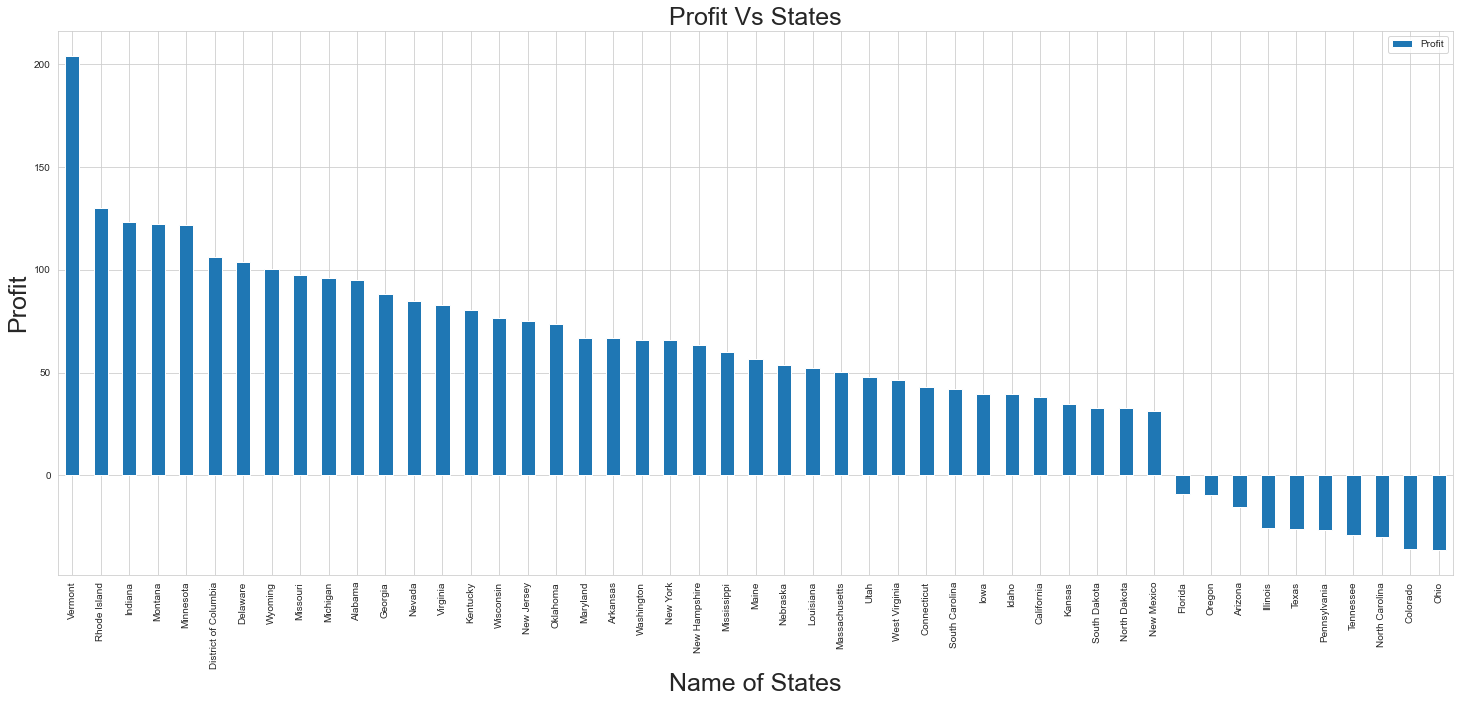

In [44]:
data_state[['Profit']].plot(kind = 'bar', figsize=(25,10))
plt.xlabel("Name of States", size = '25')
plt.ylabel("Profit", size = '25')
plt.title("Profit Vs States", size = '25')
plt.legend()

##### "Vermont" has highest Profit
##### "Ohio" has lowest Profit

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234EE1A9550>],
      dtype=object)

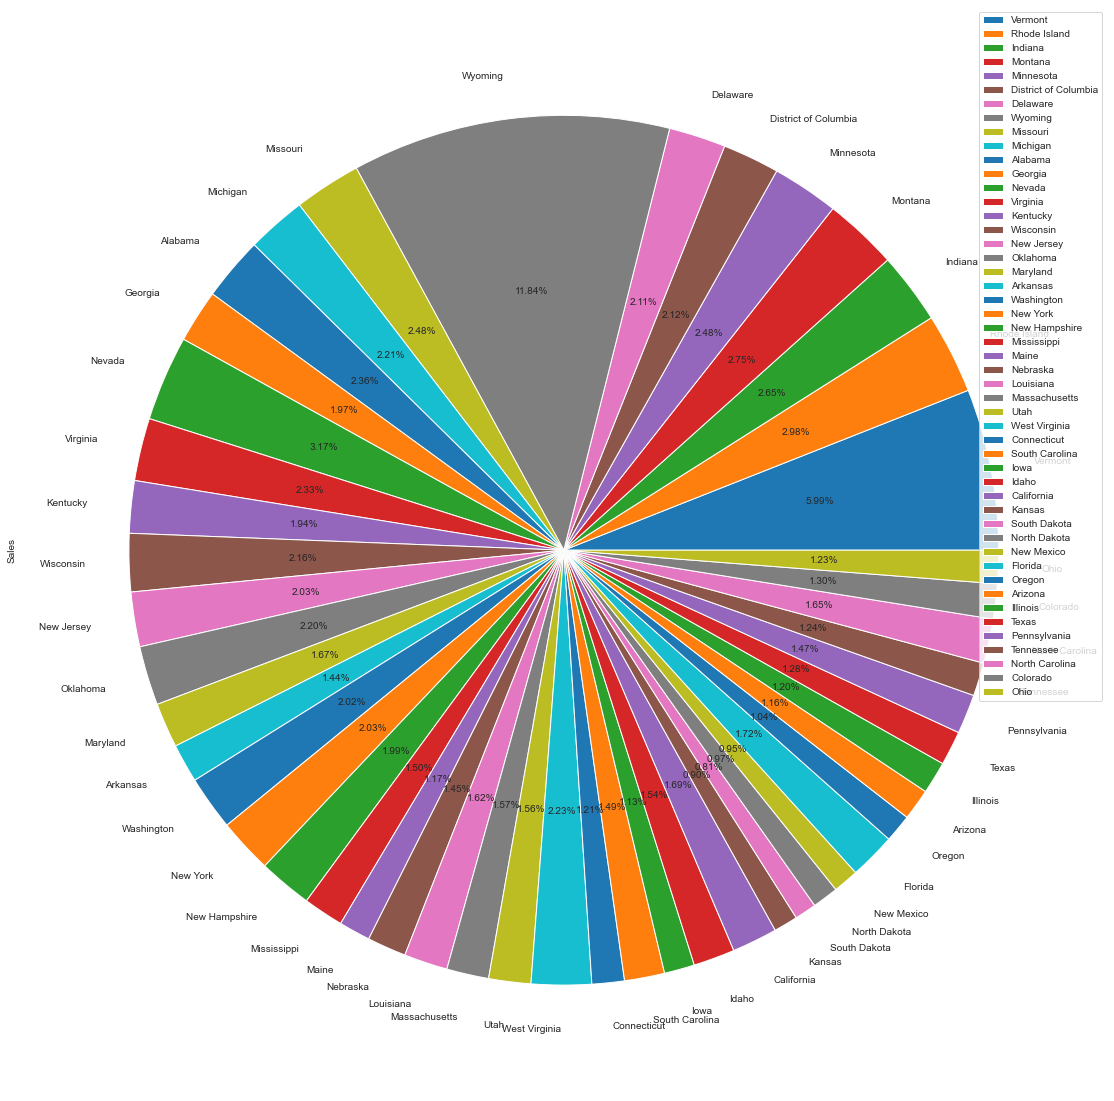

In [45]:
data_state[['Sales']].plot.pie(subplots=True, label=data_state.index, autopct='%1.2f%%', figsize=(60,20))

#### Plotting Top 30 States, which is having the Highest Sales.

In [46]:
data_state_sale = data_state.sort_values('Sales', ascending = False)

Text(0, 0.5, 'Sales')

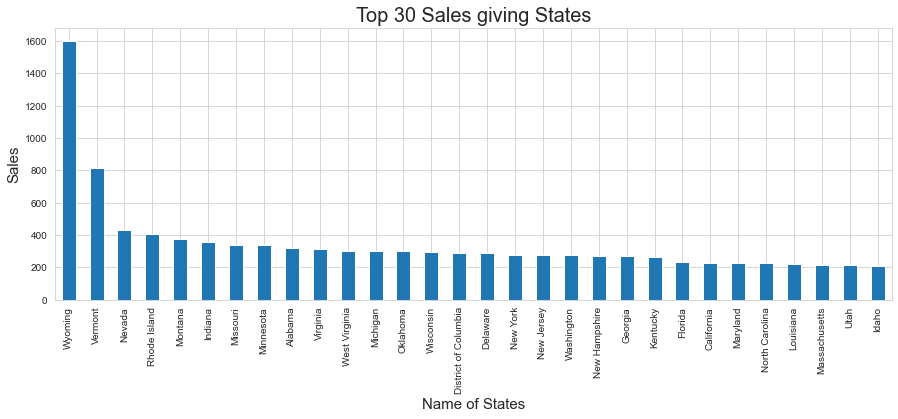

In [47]:
data_state_sale['Sales'].head(30).plot(kind='bar',figsize=(15,5))
plt.title("Top 30 Sales giving States", size="20")
plt.xlabel("Name of States", size = "15")
plt.ylabel("Sales", size = "15")

##### Plotting of Least 30 States, which is having the Lowest Sales

Text(0, 0.5, 'Sales')

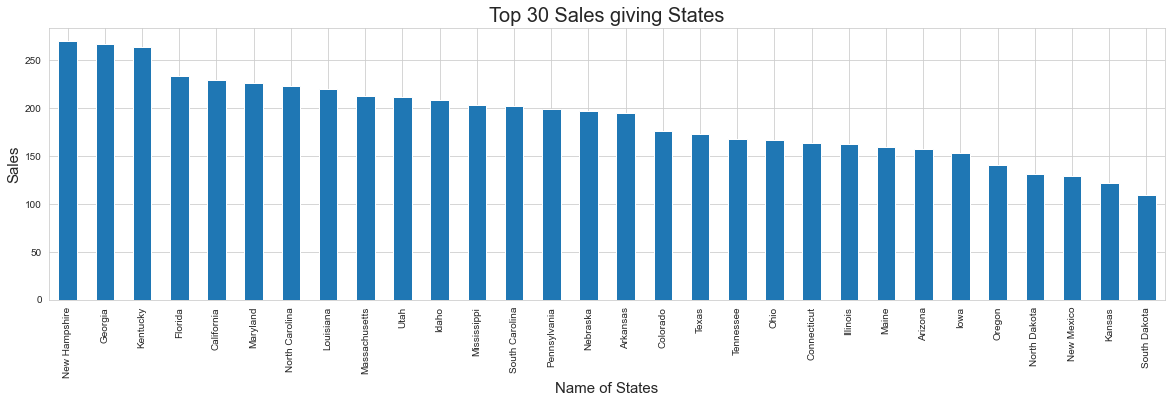

In [48]:
data_state_sale['Sales'].tail(30).plot(kind='bar',figsize=(20,5))
plt.title("Top 30 Sales giving States", size="20")
plt.xlabel("Name of States", size = "15")
plt.ylabel("Sales", size = "15")

##### "Wyoming" has Highest Sales
##### "South Dakota" has Lowest Sales

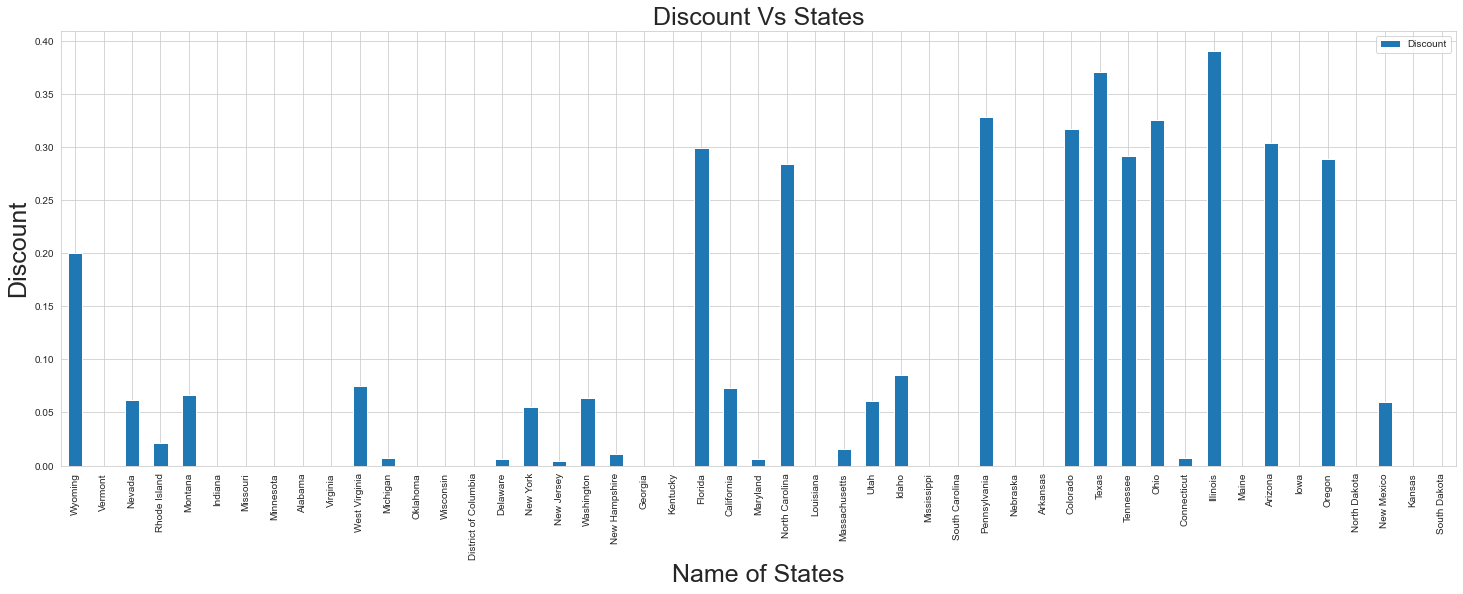

In [49]:
data_state_sale[['Discount']].plot(kind = 'bar', figsize=(25,8))
plt.xlabel("Name of States", size = '25')
plt.ylabel("Discount", size = '25')
plt.title("Discount Vs States", size = '25')
plt.legend()

### 5. Based on Category

In [50]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [51]:
data_cat = data.groupby(['Category'])[['Sales','Discount','Profit']].mean()
data_cat.head()

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234EE64A310>,
      dtype=object)

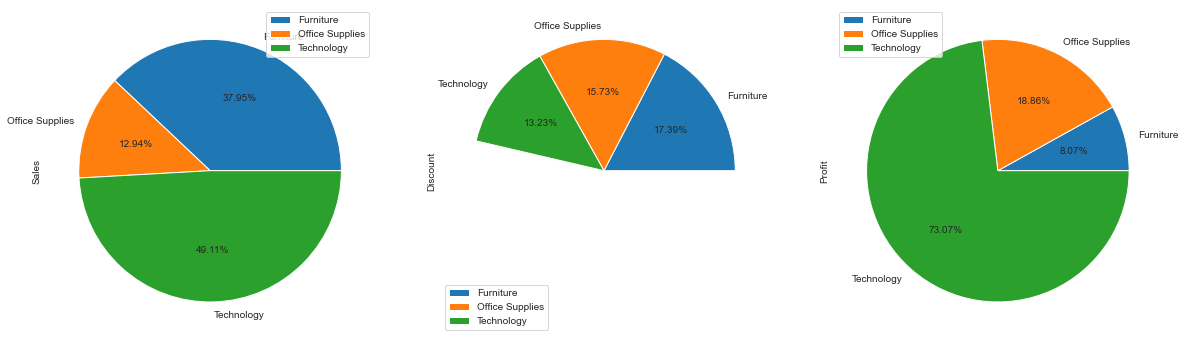

In [52]:
data_cat.plot.pie(subplots=True, label=data_cat.index, autopct='%1.2f%%', figsize=(20,20))

##### Highest Sales and Profit is in "Technology"
##### Highest Discount is given in "Furniture"

##### Though "Furniture" has 37.95% of Sales and 17.39% of Discount but still its Profit is too less.


### 6. Based on Sub-Category

In [53]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [54]:
data_subcat = data.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean()
data_subcat.head()

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234EDFE8280>,
      dtype=object)

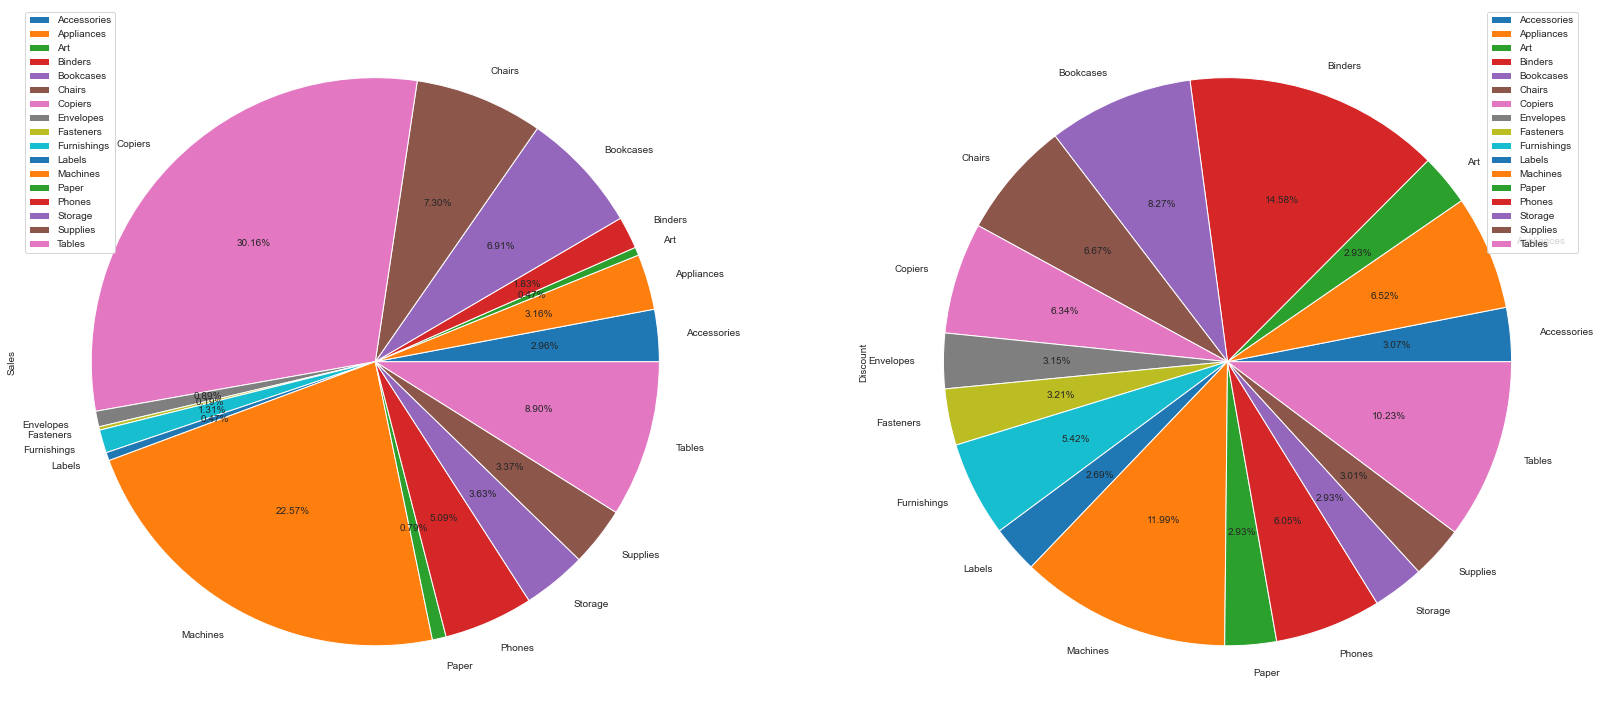

In [55]:
data_subcat[['Sales','Discount']].plot.pie(subplots=True, label=data_subcat.index, autopct='%1.2f%%', figsize=(28,20))

##### Maximum Sales is in "copiers"
##### Minimum Sales is in "Art"
##### Maximum Discount is in "Binders"
##### Minimum Discount is in "Envelopes"

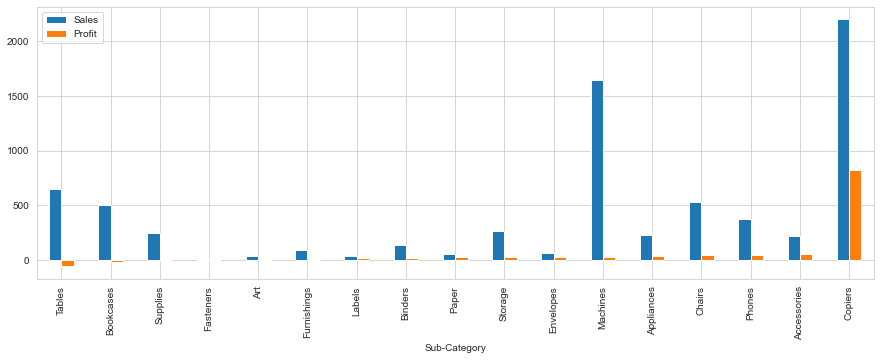

In [56]:
data_subcat.sort_values('Profit')[['Sales','Profit']].plot(kind='bar', label=['Average Sales Prices','Profit'], figsize = (15,5))

#### We should about discount on Tables, though having good sales of Table, Profit is negative i.e not at all.Also huge discount on Machines, so very less Profit after large sales.

In [57]:
7. Based on Region





SyntaxError: invalid syntax (<ipython-input-57-3325ca6f63c3>, line 1)

In [ ]:
data['Region'].value_counts()

In [ ]:
data_Region = data.groupby(['Region'])[['Sales','Discount','Profit']].mean()
data_Region.head()

In [ ]:
data_Region.plot.pie(subplots=True, label=data_Region.index, autopct='%1.2f%%', figsize=(20,20))

##### "Sales" is nearly same in all Regions
##### "Discount" is more in Central
##### "Profit" is more in West

### Solution

###### Profit is more than Sales.
###### Furniture has less profit mainly because of huge discount on Tables.
###### So need to think about discount on Tables.
###### Quantity doesn't affect the profit , that means Profit per item is not consistent.
###### State Ohio : Lowest Profit
###### State Vermont : Highest Profit
###### Out of Total Profit 73% is from Technology.

###### 'Sales' and 'Profit' are Moderately Correlated.
###### 'Quantity' and 'Profit' are less Moderately Correlated.
###### 'Discount' and 'Profit' are Negatively Correlated.
###### Lowest amount of Sales : South Dakota (0.8%)

### Conclusion

### After the successful visaualisation, the Objective is to find the weak areas in bussiness problems that have been derived through the analysis.